In [1]:
import os
os.chdir('/scratch/sagarsj42')

In [2]:
import re
import math
import json
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def get_stats(arr):
    return {
        'count': len(arr),
        'mean': arr.mean(),
        'std': arr.std(),
        'median': np.median(arr),
        'min': arr.min(),
        'max': arr.max()
    }

In [4]:
INFO_DATA_PATH = './yt8m-info'
split = 'dev'

In [5]:
info_df = pd.read_json(os.path.join(INFO_DATA_PATH, f'{split}.jsonl'), lines=True)

print(info_df.info())

info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30026 entries, 0 to 30025
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   vid               30026 non-null  object             
 1   title             29225 non-null  object             
 2   description       29225 non-null  object             
 3   publish_time      29225 non-null  datetime64[ns, UTC]
 4   channel_id        29225 non-null  object             
 5   channel_title     29225 non-null  object             
 6   tags              29225 non-null  object             
 7   view_count        29225 non-null  float64            
 8   like_count        29225 non-null  float64            
 9   comment_count     29225 non-null  float64            
 10  fav_count         29225 non-null  float64            
 11  duration          29225 non-null  object             
 12  definition        29225 non-null  object             
 13  l

,vid,title,description,publish_time,channel_id,channel_title,tags,view_count,like_count,comment_count,fav_count,duration,definition,licensed_content,content_rating,projection,dimension,caption
0,l2qBnK3Phks,Scorpions - WIND OF CHANGE - Nürnberg Arena 25...,The Scorpions live at the Arena in Nuremberg (...,2010-11-29 15:01:51+00:00,UCYckckJlBEc4OVaT6ds63Bw,Marco's Music Channel,"Scorpions (Musical Group),Wind Of Change,Hard ...",9640.0,23.0,0.0,0.0,5:24,hd,1.0,{},rectangular,2d,false
1,MakeMGirX6I,Stoyan Yankoulov,www.stoyankoulov.com\nSolo Tupan\n\n\nyankulov,2007-08-10 20:40:46+00:00,UChqjaIpaE8QRd1AJYLMB_fA,Stoyan Yankoulov,"World,Music,Ethno,Jazz,Folk,Drums,Percussion,E...",56723.0,232.0,16.0,0.0,2:43,sd,0.0,{},rectangular,2d,false
2,GXHQCGKux8k,Molotov - Puto - La Trastienda 27.10.10,Recital Precensal\n=),2010-10-30 15:19:03+00:00,UC1z_7LGKBe749qVfea9tOyQ,ChechuManson,MOV02982,8490.0,22.0,6.0,0.0,4:19,sd,0.0,{},rectangular,2d,false
3,cdOe_wq7_oU,Branden From Neon Trees Demos the Mike Lull 'J...,Neon Trees' Bassist Branden Campbell stopped b...,2014-08-12 20:45:48+00:00,UCI5tGbwiVHy4BsZUXcSWvwQ,Chicago Music Exchange,"cme,chicago music exchange,review,demo,Neon Tr...",43298.0,234.0,39.0,0.0,5:20,hd,1.0,{},rectangular,2d,false
4,61c9_avmN9A,"Chimpanzees feeling the Beat of the Drum "" LI...",Chimps at Chimp Haven jamming to the beat of t...,2008-08-29 08:27:04+00:00,UC9Y2dHQ4h6p9L7yVjQTdoPg,Ron Hardy,"Chimpanzee,Shreveport,Louisiana,chimp,haven,fu...",99811.0,1400.0,246.0,0.0,4:37,sd,0.0,{},rectangular,2d,false


In [6]:
duration_strs = info_df['duration'].tolist()
duration_secs = list()
for ds in duration_strs:
    if not ds or type(ds) != str:
        duration_secs.append(-1)
        continue
    
    ds_vals = ds.split(':')
    ds_sec = 0
    for i in range(1, len(ds_vals)+1):
        ds_sec += (int(ds_vals[-i]) * math.pow(60, i-1))
    duration_secs.append(ds_sec)
info_df['duration_sec'] = duration_secs

print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30026 entries, 0 to 30025
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   vid               30026 non-null  object             
 1   title             29225 non-null  object             
 2   description       29225 non-null  object             
 3   publish_time      29225 non-null  datetime64[ns, UTC]
 4   channel_id        29225 non-null  object             
 5   channel_title     29225 non-null  object             
 6   tags              29225 non-null  object             
 7   view_count        29225 non-null  float64            
 8   like_count        29225 non-null  float64            
 9   comment_count     29225 non-null  float64            
 10  fav_count         29225 non-null  float64            
 11  duration          29225 non-null  object             
 12  definition        29225 non-null  object             
 13  l

,vid,title,description,publish_time,channel_id,channel_title,tags,view_count,like_count,comment_count,fav_count,duration,definition,licensed_content,content_rating,projection,dimension,caption,duration_sec
0,l2qBnK3Phks,Scorpions - WIND OF CHANGE - Nürnberg Arena 25...,The Scorpions live at the Arena in Nuremberg (...,2010-11-29 15:01:51+00:00,UCYckckJlBEc4OVaT6ds63Bw,Marco's Music Channel,"Scorpions (Musical Group),Wind Of Change,Hard ...",9640.0,23.0,0.0,0.0,5:24,hd,1.0,{},rectangular,2d,false,324.0
1,MakeMGirX6I,Stoyan Yankoulov,www.stoyankoulov.com\nSolo Tupan\n\n\nyankulov,2007-08-10 20:40:46+00:00,UChqjaIpaE8QRd1AJYLMB_fA,Stoyan Yankoulov,"World,Music,Ethno,Jazz,Folk,Drums,Percussion,E...",56723.0,232.0,16.0,0.0,2:43,sd,0.0,{},rectangular,2d,false,163.0
2,GXHQCGKux8k,Molotov - Puto - La Trastienda 27.10.10,Recital Precensal\n=),2010-10-30 15:19:03+00:00,UC1z_7LGKBe749qVfea9tOyQ,ChechuManson,MOV02982,8490.0,22.0,6.0,0.0,4:19,sd,0.0,{},rectangular,2d,false,259.0
3,cdOe_wq7_oU,Branden From Neon Trees Demos the Mike Lull 'J...,Neon Trees' Bassist Branden Campbell stopped b...,2014-08-12 20:45:48+00:00,UCI5tGbwiVHy4BsZUXcSWvwQ,Chicago Music Exchange,"cme,chicago music exchange,review,demo,Neon Tr...",43298.0,234.0,39.0,0.0,5:20,hd,1.0,{},rectangular,2d,false,320.0
4,61c9_avmN9A,"Chimpanzees feeling the Beat of the Drum "" LI...",Chimps at Chimp Haven jamming to the beat of t...,2008-08-29 08:27:04+00:00,UC9Y2dHQ4h6p9L7yVjQTdoPg,Ron Hardy,"Chimpanzee,Shreveport,Louisiana,chimp,haven,fu...",99811.0,1400.0,246.0,0.0,4:37,sd,0.0,{},rectangular,2d,false,277.0


In [7]:
max([len(d.split(':')) for d in duration_strs if d and type(d)==str])

2

In [8]:
max([int(d.split(':')[0]) for d in duration_strs if d and type(d)==str])

28

In [9]:
relative_date = datetime.datetime(2023, 1, 1, 0, 0, 0)
published_times = info_df['publish_time'].tolist()
age_days = list()
age_years = list()
for pt in published_times:
    curr_date = pt.to_pydatetime().replace(tzinfo=None)
    if type(curr_date) != datetime.datetime:
        age_days.append(-1)
        age_years.append(-1)
        continue
    curr_sec = (relative_date - curr_date).total_seconds()
    age_days.append(curr_sec/(3600*24.0))
    age_years.append(curr_sec/(3600*24.0*365))
info_df['age_days'] = age_days
info_df['age_years'] = age_years

print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30026 entries, 0 to 30025
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   vid               30026 non-null  object             
 1   title             29225 non-null  object             
 2   description       29225 non-null  object             
 3   publish_time      29225 non-null  datetime64[ns, UTC]
 4   channel_id        29225 non-null  object             
 5   channel_title     29225 non-null  object             
 6   tags              29225 non-null  object             
 7   view_count        29225 non-null  float64            
 8   like_count        29225 non-null  float64            
 9   comment_count     29225 non-null  float64            
 10  fav_count         29225 non-null  float64            
 11  duration          29225 non-null  object             
 12  definition        29225 non-null  object             
 13  l

,vid,title,description,publish_time,channel_id,channel_title,tags,view_count,like_count,comment_count,...,duration,definition,licensed_content,content_rating,projection,dimension,caption,duration_sec,age_days,age_years
0,l2qBnK3Phks,Scorpions - WIND OF CHANGE - Nürnberg Arena 25...,The Scorpions live at the Arena in Nuremberg (...,2010-11-29 15:01:51+00:00,UCYckckJlBEc4OVaT6ds63Bw,Marco's Music Channel,"Scorpions (Musical Group),Wind Of Change,Hard ...",9640.0,23.0,0.0,...,5:24,hd,1.0,{},rectangular,2d,false,324.0,4415.373715,12.096914
1,MakeMGirX6I,Stoyan Yankoulov,www.stoyankoulov.com\nSolo Tupan\n\n\nyankulov,2007-08-10 20:40:46+00:00,UChqjaIpaE8QRd1AJYLMB_fA,Stoyan Yankoulov,"World,Music,Ethno,Jazz,Folk,Drums,Percussion,E...",56723.0,232.0,16.0,...,2:43,sd,0.0,{},rectangular,2d,false,163.0,5622.138356,15.403119
2,GXHQCGKux8k,Molotov - Puto - La Trastienda 27.10.10,Recital Precensal\n=),2010-10-30 15:19:03+00:00,UC1z_7LGKBe749qVfea9tOyQ,ChechuManson,MOV02982,8490.0,22.0,6.0,...,4:19,sd,0.0,{},rectangular,2d,false,259.0,4445.361771,12.179073
3,cdOe_wq7_oU,Branden From Neon Trees Demos the Mike Lull 'J...,Neon Trees' Bassist Branden Campbell stopped b...,2014-08-12 20:45:48+00:00,UCI5tGbwiVHy4BsZUXcSWvwQ,Chicago Music Exchange,"cme,chicago music exchange,review,demo,Neon Tr...",43298.0,234.0,39.0,...,5:20,hd,1.0,{},rectangular,2d,false,320.0,3063.134861,8.392150
4,61c9_avmN9A,"Chimpanzees feeling the Beat of the Drum "" LI...",Chimps at Chimp Haven jamming to the beat of t...,2008-08-29 08:27:04+00:00,UC9Y2dHQ4h6p9L7yVjQTdoPg,Ron Hardy,"Chimpanzee,Shreveport,Louisiana,chimp,haven,fu...",99811.0,1400.0,246.0,...,4:37,sd,0.0,{},rectangular,2d,false,277.0,5237.647870,14.349720


{'count': 30026, 'mean': 243.28568573902618, 'std': 99.68170742836736, 'median': 234.0, 'min': -1.0, 'max': 1693.0}


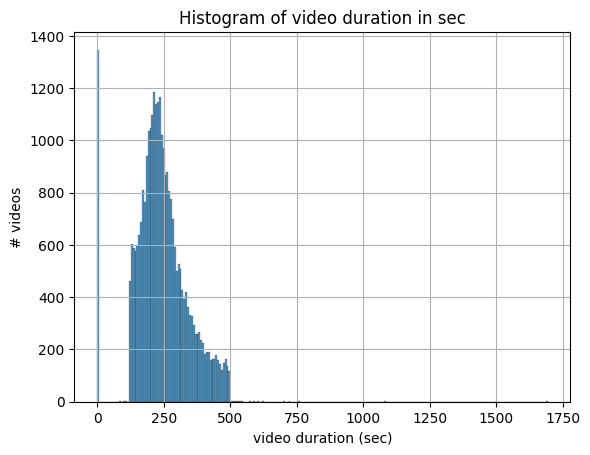

In [10]:
durs = np.array(duration_secs)
print(get_stats(durs))
sns.histplot(durs)
plt.grid()
plt.title('Histogram of video duration in sec')
plt.xlabel('video duration (sec)')
plt.ylabel('# videos')
plt.show()

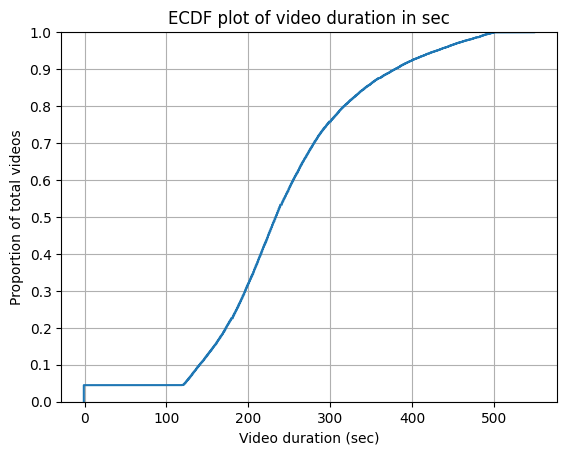

In [11]:
sns.ecdfplot(np.clip(durs, a_min=-2, a_max=550))
plt.yticks(np.linspace(0.0, 1.0, 11))
plt.grid()
plt.title('ECDF plot of video duration in sec')
plt.xlabel('Video duration (sec)')
plt.ylabel('Proportion of total videos')
plt.show()

{'count': 30026, 'mean': 10.99974303729069, 'std': 2.9487993200944955, 'median': 11.074876981861998, 'min': -1.0, 'max': 17.240340911973618}


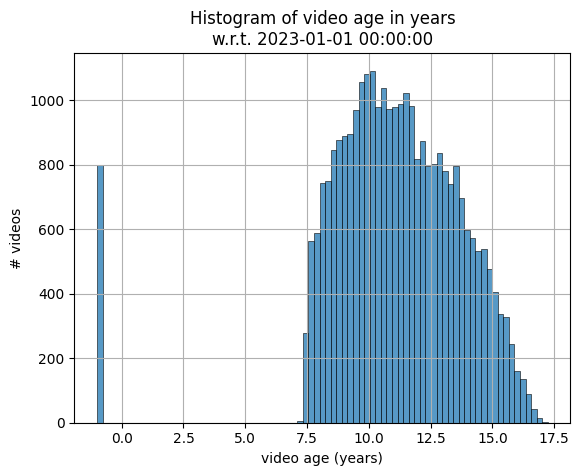

In [12]:
age_y = np.array(age_years)
print(get_stats(age_y))
sns.histplot(age_y)
plt.grid()
plt.title(f'Histogram of video age in years\nw.r.t. {relative_date}')
plt.xlabel('video age (years)')
plt.ylabel('# videos')
plt.show()

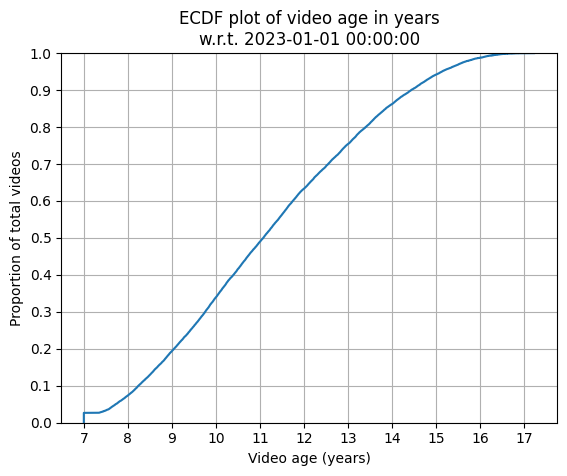

In [13]:
sns.ecdfplot(np.clip(age_y, a_min=7, a_max=100))
plt.xticks(np.arange(7.0, 18.0, 1))
plt.yticks(np.linspace(0.0, 1.0, 11))
plt.grid()
plt.title(f'ECDF plot of video age in years\nw.r.t. {relative_date}')
plt.xlabel('Video age (years)')
plt.ylabel('Proportion of total videos')
plt.show()

{'count': 29225, 'mean': 7.852694610778443, 'std': 3.506312773558409, 'median': 8.0, 'min': 1, 'max': 23}


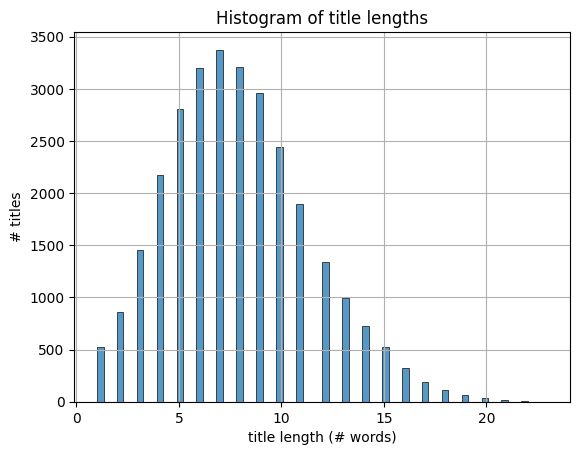

In [14]:
titles = info_df['title'].tolist()
title_lens = np.array([len(t.split()) for t in titles if type(t) == str])
print(get_stats(title_lens))
sns.histplot(title_lens)
plt.grid()
plt.title('Histogram of title lengths')
plt.xlabel('title length (# words)')
plt.ylabel('# titles')
plt.show()

{'count': 29225, 'mean': 38.45300256629598, 'std': 73.8660109172609, 'median': 16.0, 'min': 0, 'max': 932}


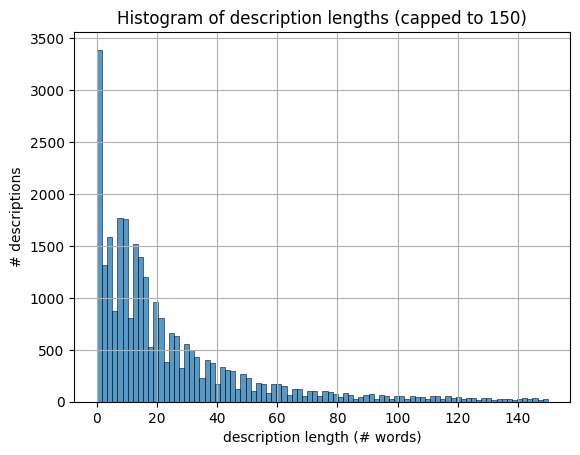

In [15]:
descs = info_df['description'].tolist()
desc_lens = list()
for d in descs:
    if type(d) != str:
        continue
    d = re.sub(r'\s\s+', ' ', d)
    d = re.sub(r'\n', ' ', d)
    desc_lens.append(len(d.split()))
desc_lens = np.array(desc_lens)
max_cap = 150
print(get_stats(desc_lens))
sns.histplot(desc_lens, binrange=(0, max_cap))
plt.grid()
plt.title(f'Histogram of description lengths (capped to {max_cap})')
plt.xlabel('description length (# words)')
plt.ylabel('# descriptions')
plt.show()

{'count': 29225, 'mean': 10.706313088109495, 'std': 10.676101218110528, 'median': 8.0, 'min': 1, 'max': 93}


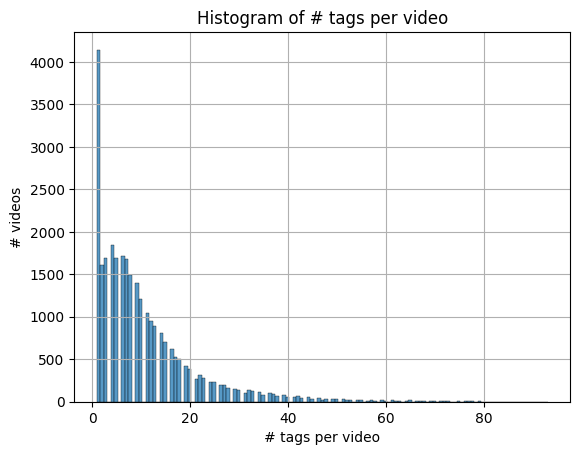

In [16]:
tags = info_df['tags'].tolist()
n_tags = np.array([len(t.split(',')) for t in tags if type(t) == str])
print(get_stats(n_tags))
sns.histplot(n_tags)
plt.grid()
plt.title(f'Histogram of # tags per video')
plt.xlabel('# tags per video')
plt.ylabel('# videos')
plt.show()

{'count': 29224, 'mean': 163816.59783055022, 'std': 2783617.510208557, 'median': 5654.5, 'min': 1010.0, 'max': 293906508.0}


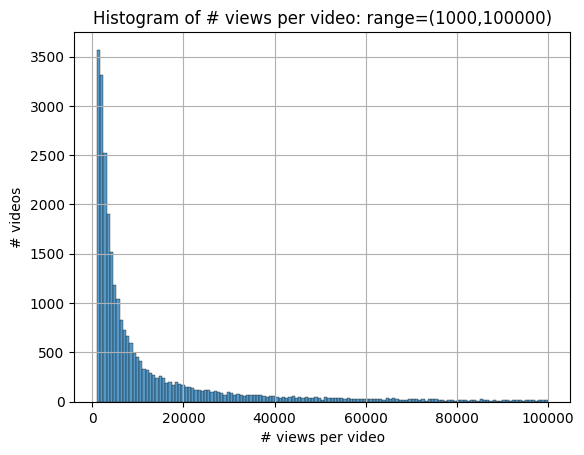

In [17]:
n_views = np.array([v for v in info_df['view_count'].tolist() if v > -1])
print(get_stats(n_views))
min_views_cap = 1000
max_views_cap = 100000
sns.histplot(n_views, binrange=(min_views_cap, max_views_cap))
plt.grid()
plt.title(f'Histogram of # views per video: range=({min_views_cap},{max_views_cap})')
plt.xlabel('# views per video')
plt.ylabel('# videos')
plt.show()

{'count': 28786, 'mean': 926.4017230598207, 'std': 13603.265132366678, 'median': 29.0, 'min': 0.0, 'max': 1263733.0}


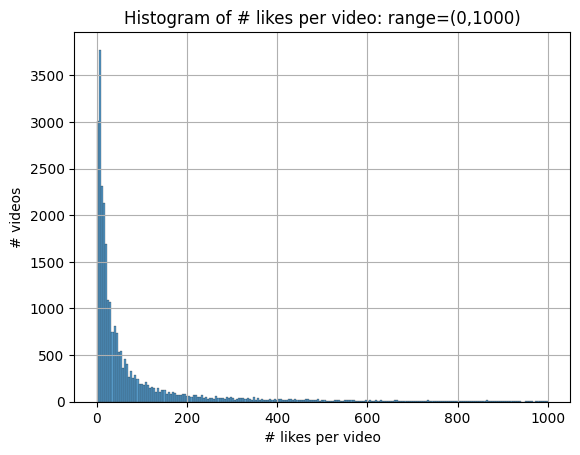

In [18]:
n_likes = np.array([l for l in info_df['like_count'].tolist() if l > -1])
print(get_stats(n_likes))
min_likes_cap = 0
max_likes_cap = 1000
sns.histplot(n_likes, binrange=(min_likes_cap, max_likes_cap))
plt.grid()
plt.title(f'Histogram of # likes per video: range=({min_likes_cap},{max_likes_cap})')
plt.xlabel('# likes per video')
plt.ylabel('# videos')
plt.show()

{'count': 28590, 'mean': 55.43144456103533, 'std': 912.3722620540528, 'median': 4.0, 'min': 0.0, 'max': 105095.0}


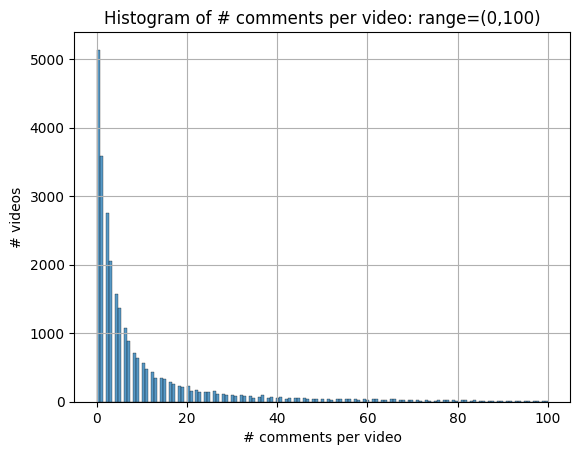

In [19]:
n_comments = np.array([c for c in info_df['comment_count'].tolist() if c > -1])
print(get_stats(n_comments))
min_comments_cap = 0
max_comments_cap = 100
sns.histplot(n_comments, binrange=(min_comments_cap, max_comments_cap))
plt.grid()
plt.title(f'Histogram of # comments per video: range=({min_comments_cap},{max_comments_cap})')
plt.xlabel('# comments per video')
plt.ylabel('# videos')
plt.show()

In [20]:
n_favs = np.array([f for f in info_df['fav_count'].tolist() if f > -1])
print(get_stats(n_favs))
# min_favs_cap = 0
# max_favs_cap = 100
# sns.histplot(n_favs, binrange=(min_favs_cap, max_favs_cap))
# plt.grid()
# plt.title(f'Histogram of # favourites per video: range=({min_favs_cap},{max_favs_cap})')
# plt.xlabel('# favourites per video')
# plt.ylabel('# videos')
# plt.show()

{'count': 29225, 'mean': 0.0, 'std': 0.0, 'median': 0.0, 'min': 0.0, 'max': 0.0}
